In [1]:
### This project is sentiment analysis on twitter data using natural language processing



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df=pd.read_csv('Twitter.csv')
print(df.shape)
df=df.head(500)
print(df.shape)


(74681, 4)
(500, 4)


In [3]:



data = pd.read_csv('Twitter.csv', sep=',', header=None)


print(data.head())


num_columns = data.apply(lambda row: len(row), axis=1)
print(num_columns.value_counts())


if num_columns.max() == 5:
    column_names = ['ID', 'Product', 'Sentiment', 'Text']
else:
    column_names = ['Column{}'.format(i) for i in range(num_columns.max())]


data.columns = column_names



df.head()


      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
4    74682
dtype: int64


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:



data = pd.read_csv('Twitter.csv', sep=',', header=None)


print("First few rows and their lengths:")
print(data.head())
print(data.apply(lambda row: len(row), axis=1).head())


num_columns = data.apply(lambda row: len(row), axis=1)
print("Number of columns in each row:")
print(num_columns.value_counts())


if num_columns.max() == 5:
    column_names = ['ID', 'Product', 'Sentiment', 'Text', 'ExtraColumn']
else:
    column_names = ['Column{}'.format(i) for i in range(num_columns.max())]

data.columns = column_names


print("DataFrame with column names:")
data.head()


First few rows and their lengths:
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
0    4
1    4
2    4
3    4
4    4
dtype: int64
Number of columns in each row:
4    74682
dtype: int64
DataFrame with column names:


,Column0,Column1,Column2,Column3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
data.head()

,Column0,Column1,Column2,Column3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:

data.rename(columns={	'Column0': 'ID', 'Column1': 'Product', 'Column2': 'Sentiment', 'Column3': 'Text'}, inplace=True)
data


,ID,Product,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
example = data['Text'][50]
print(example)

Guilty of sobriety! A bit of a borderline. I was called to work early tomorrow, so I can't catch up.


In [8]:
import nltk


nltk.download('punkt')


example = data['Text'][50]
print(example)


tokens = nltk.word_tokenize(example)
print(tokens)

Guilty of sobriety! A bit of a borderline. I was called to work early tomorrow, so I can't catch up.
['Guilty', 'of', 'sobriety', '!', 'A', 'bit', 'of', 'a', 'borderline', '.', 'I', 'was', 'called', 'to', 'work', 'early', 'tomorrow', ',', 'so', 'I', 'ca', "n't", 'catch', 'up', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
nltk.word_tokenize(example)

['Guilty',
 'of',
 'sobriety',
 '!',
 'A',
 'bit',
 'of',
 'a',
 'borderline',
 '.',
 'I',
 'was',
 'called',
 'to',
 'work',
 'early',
 'tomorrow',
 ',',
 'so',
 'I',
 'ca',
 "n't",
 'catch',
 'up',
 '.']

In [10]:
import nltk


nltk.download('averaged_perceptron_tagger')


tagged = nltk.pos_tag(tokens)


print(tagged[:10])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Guilty', 'NN'), ('of', 'IN'), ('sobriety', 'NN'), ('!', '.'), ('A', 'DT'), ('bit', 'NN'), ('of', 'IN'), ('a', 'DT'), ('borderline', 'NN'), ('.', '.')]


In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Guilty', 'NN'),
 ('of', 'IN'),
 ('sobriety', 'NN'),
 ('!', '.'),
 ('A', 'DT'),
 ('bit', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('borderline', 'NN'),
 ('.', '.')]

In [12]:
import nltk

# Download NLTK data for named entity chunking
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Assuming 'tagged' contains the POS-tagged tokens
entities = nltk.chunk.ne_chunk(tagged)

# Print the chunked entities
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...


[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (GPE Guilty/NN)
  of/IN
  sobriety/NN
  !/.
  A/DT
  bit/NN
  of/IN
  a/DT
  borderline/NN
  ./.
  I/PRP
  was/VBD
  called/VBN
  to/TO
  work/VB
  early/JJ
  tomorrow/NN
  ,/,
  so/IN
  I/PRP
  ca/MD
  n't/RB
  catch/VB
  up/RP
  ./.)


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores("Guilty of sobriety! A bit of a borderline. I was called to work early tomorrow, so I can't catch up.")


{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4753}

In [15]:
sia.polarity_scores('was')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
from tqdm.notebook import tqdm

res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = str(row['Text']) 
    myid = row['ID']
    if text != 'nan':  
        res[myid] = sia.polarity_scores(text)


  0%|          | 0/74682 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(data, how='left')

In [18]:
vaders.head()

,ID,neg,neu,pos,compound,Product,Sentiment,Text
0,2401,0.37,0.63,0.0,-0.6908,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,0.37,0.63,0.0,-0.6908,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,0.37,0.63,0.0,-0.6908,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,0.37,0.63,0.0,-0.6908,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,0.37,0.63,0.0,-0.6908,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


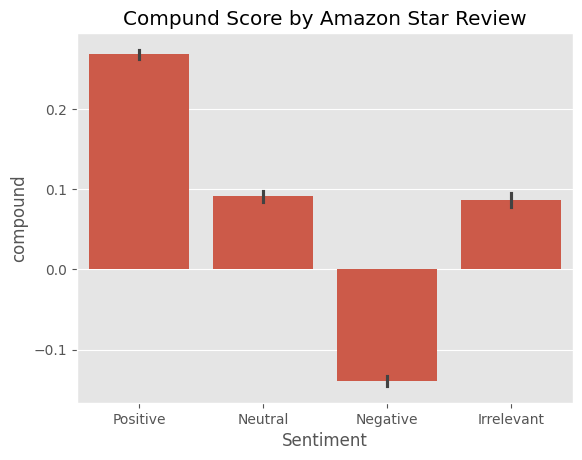

In [19]:
ax = sns.barplot(data=vaders, x='Sentiment', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

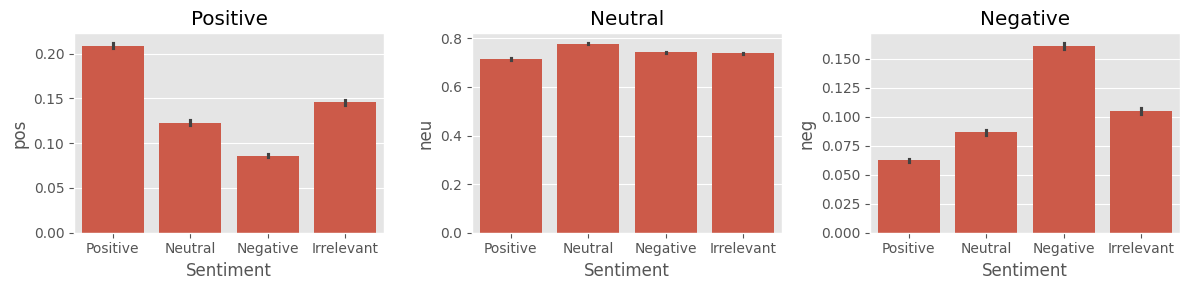

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [23]:
print(example)
sia.polarity_scores(example)

Guilty of sobriety! A bit of a borderline. I was called to work early tomorrow, so I can't catch up.


{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4753}

In [24]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.58210206, 'roberta_neu': 0.35969695, 'roberta_pos': 0.05820102}


In [25]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [26]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['ID']
        
        
        if isinstance(text, str):
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res[myid] = both
        else:
            print(f'Skipped row with non-string text for ID {myid}')
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/74682 [00:00<?, ?it/s]

Skipped row with non-string text for ID 2411
Skipped row with non-string text for ID 2496
Skipped row with non-string text for ID 2503
Skipped row with non-string text for ID 2532
Skipped row with non-string text for ID 2595
Skipped row with non-string text for ID 2595
Skipped row with non-string text for ID 1602
Skipped row with non-string text for ID 1602
Skipped row with non-string text for ID 1602
Skipped row with non-string text for ID 1613
Skipped row with non-string text for ID 1622
Skipped row with non-string text for ID 1632
Skipped row with non-string text for ID 1632
Skipped row with non-string text for ID 1708
Skipped row with non-string text for ID 1717
Skipped row with non-string text for ID 1719
Skipped row with non-string text for ID 1719
Skipped row with non-string text for ID 1719
Skipped row with non-string text for ID 1731
Skipped row with non-string text for ID 1737
Skipped row with non-string text for ID 1763
Skipped row with non-string text for ID 1763
Skipped ro

In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(data, how='left')

In [30]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Product', 'Sentiment',
       'Text'],
      dtype='object')

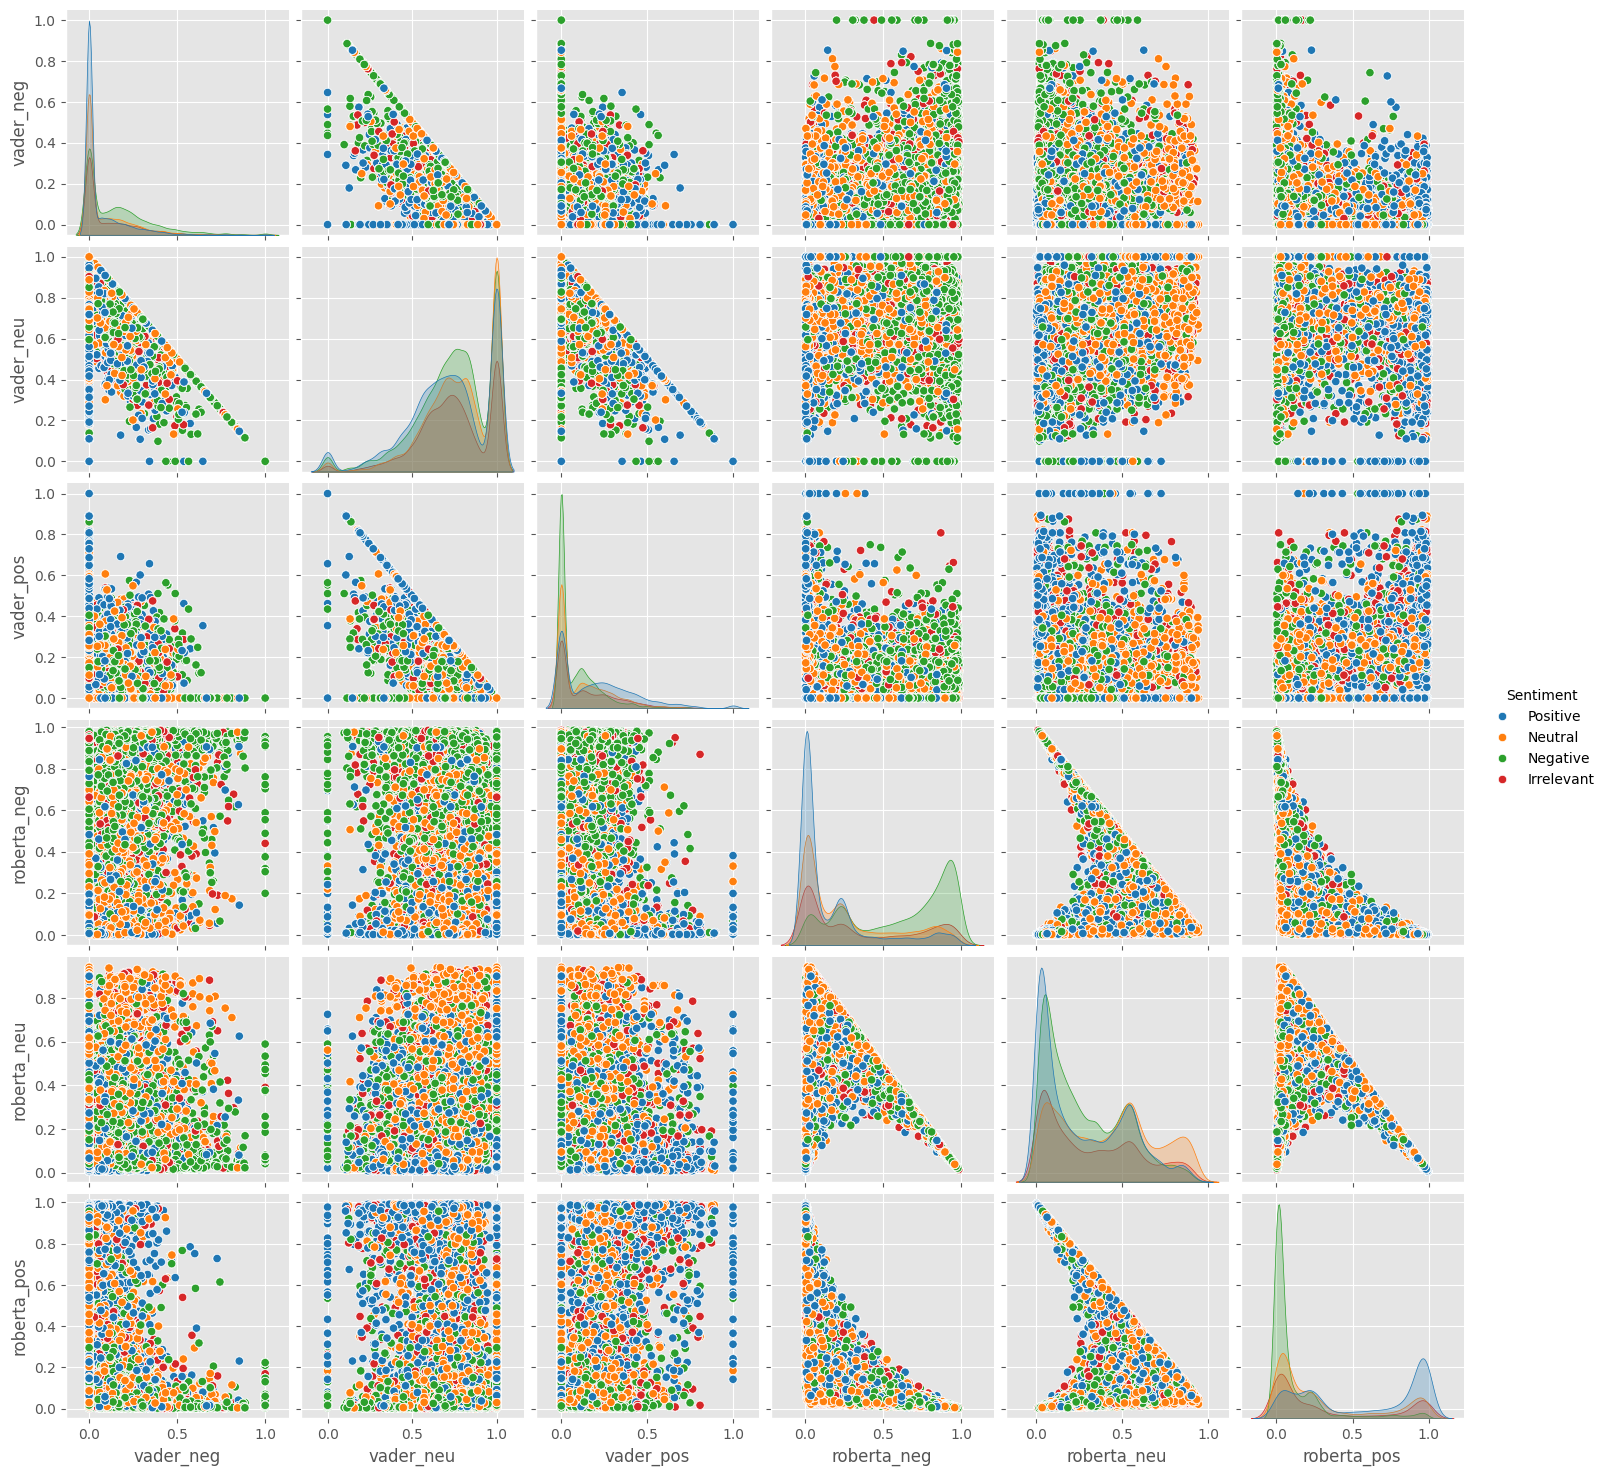

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Sentiment',
            palette='tab10')
plt.show()

In [33]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('I love sentiment analysis!')